In [4]:
import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import cv2


In [5]:
train = pd.read_csv('images.csv')
train.head()

,Images,Labels,1,2,3
0,./1/1.jpg,1,1,0,0
1,./1/10.jpg,1,1,0,0
2,./1/100.jpg,1,1,0,0
3,./1/101.jpg,1,1,0,0
4,./1/102.jpg,1,1,0,0


In [6]:
train.columns

Index(['Images', 'Labels', '1', '2', '3'], dtype='object')

In [7]:
img = cv2.imread(train['Images'][1])
img.shape

(256, 256, 3)

In [8]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(train['Images'][i])
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [00:08<00:00, 43.26it/s]


In [9]:
X.shape

(360, 256, 256, 3)

2

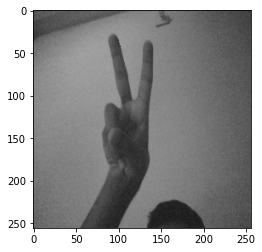

In [10]:
plt.imshow(X[201])
train['Labels'][201]

In [11]:
y = np.array(train.drop(['Images', 'Labels'],axis=1))
y = np.array(train['Labels'])
y= tf.keras.utils.to_categorical(y)
y.shape

(360, 4)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [13]:
y_train.shape

(324, 4)

In [14]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Conv2D(16, (2,2), input_shape=(256, 256, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'),
  tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [16]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
11/11 [==============================] - 37s 2s/step - loss: 0.5641 - accuracy: 0.4127
Epoch 2/5
11/11 [==============================] - 19s 2s/step - loss: 0.3943 - accuracy: 0.7920
Epoch 3/5
11/11 [==============================] - 19s 2s/step - loss: 0.1572 - accuracy: 0.8854
Epoch 4/5
11/11 [==============================] - 19s 2s/step - loss: 0.0287 - accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 19s 2s/step - loss: 0.0046 - accuracy: 1.0000


In [18]:
classifications = model.predict(X_test)


In [37]:
img = image.load_img('112.jpg')
img = image.img_to_array(img)
img = cv2.resize(img,(256,256)) 
img = img/255

[[4.0859828e-15 1.4545639e-04 1.0962856e-05 9.9984360e-01]]


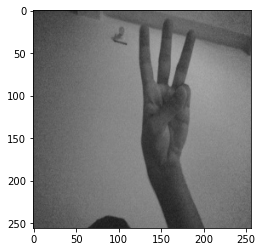

In [39]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,256,256,3))
print(proba)